# Embedding (Gensim)

In [91]:
import nltk
from nltk.corpus import wordnet as wn
import pandas as pd
import numpy as np

import gensim.downloader

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [92]:
MODEL_NAME = "glove-wiki-gigaword-100"
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models (for more pretrain models)
model = gensim.downloader.load(MODEL_NAME)

In [93]:
## get data
def get_all_hyponyms(synset_name):
    try:
        base_synset = wn.synset(synset_name)
    except:
        return set()

    all_sub_synsets = list(base_synset.closure(lambda s: s.hyponyms()))
    
    all_words = set()
    for synset in all_sub_synsets:
        for lemma in synset.lemmas():
            word = lemma.name()
            if len(word.split("_")) > 1: continue
            all_words.add(word)

    return all_words

fruits = list(get_all_hyponyms("fruit.n.01"))

In [94]:
vec_fruits = [[f, model[f]] for f in fruits if f in model]
fruits_name = [f[0] for f in vec_fruits][:50]
fruits_vec  = [f[1] for f in vec_fruits][:50]
fruits_tsne = TSNE(n_components=2, random_state=42).fit_transform(np.array(fruits_vec))

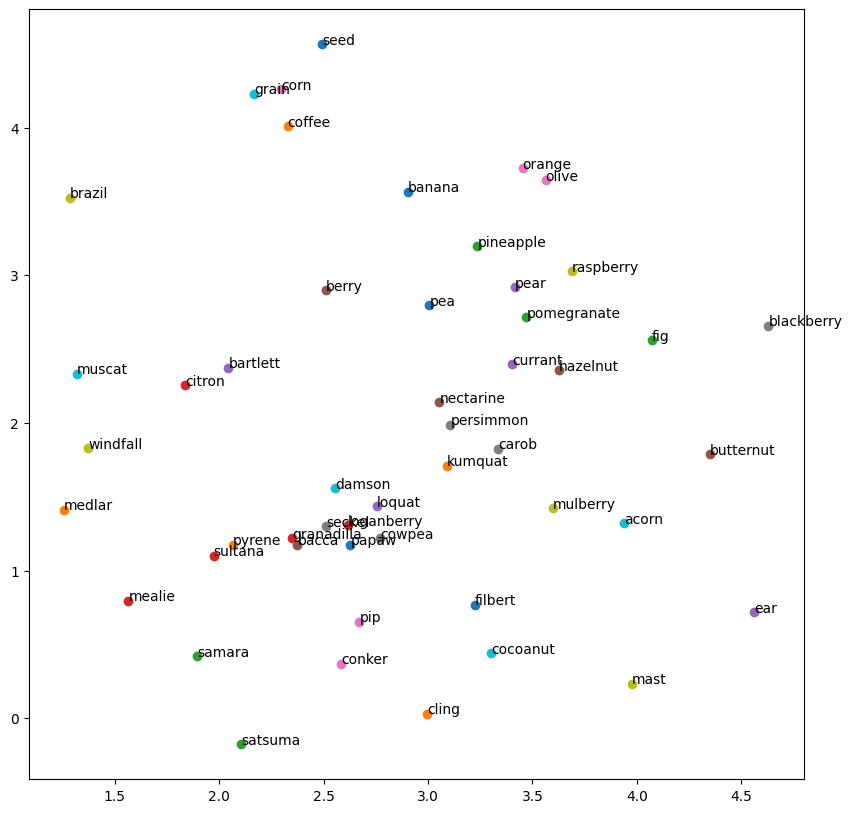

In [95]:
plt.figure(figsize = (10, 10))
for i, word in enumerate(fruits_name):
    plt.scatter(fruits_tsne[i, 0], fruits_tsne[i, 1])
    plt.annotate(word, (fruits_tsne[i, 0], fruits_tsne[i, 1]))


## 利用 Word2Vec 查看字之間的關係

### 1. 觀察詞之間的相似性

給兩個詞組
$
(w_1, w_2), (w_3, w_4)
$
他們的關係是相近的
像是：
$
(mother, father), (aunt, uncle)
$
<br>
我們可以利用 Word2Vec 去觀察這個相似性
<br>
假設他們的代號是a, b, c, d

In [96]:
f_words = ["mother", "father"]
l_words = ["aunt", "uncle"]

a = f_words[0]
b = f_words[1]

c = l_words[0]
d = l_words[1]

# b - a ~ d - c
# --> 
# d ~ b - a + c

pred = model.most_similar(positive = [b, c], negative = [a], topn=1)
print(pred) # 輸出為一個字，以及他們彼此的相似程度

[('uncle', 0.9098610877990723)]


### 2. 觀察一個詞附近與他有關的詞

In [97]:
target = "taiwan"
# 取得前50個有關的詞
pred = model.most_similar(positive = [target], topn=50)

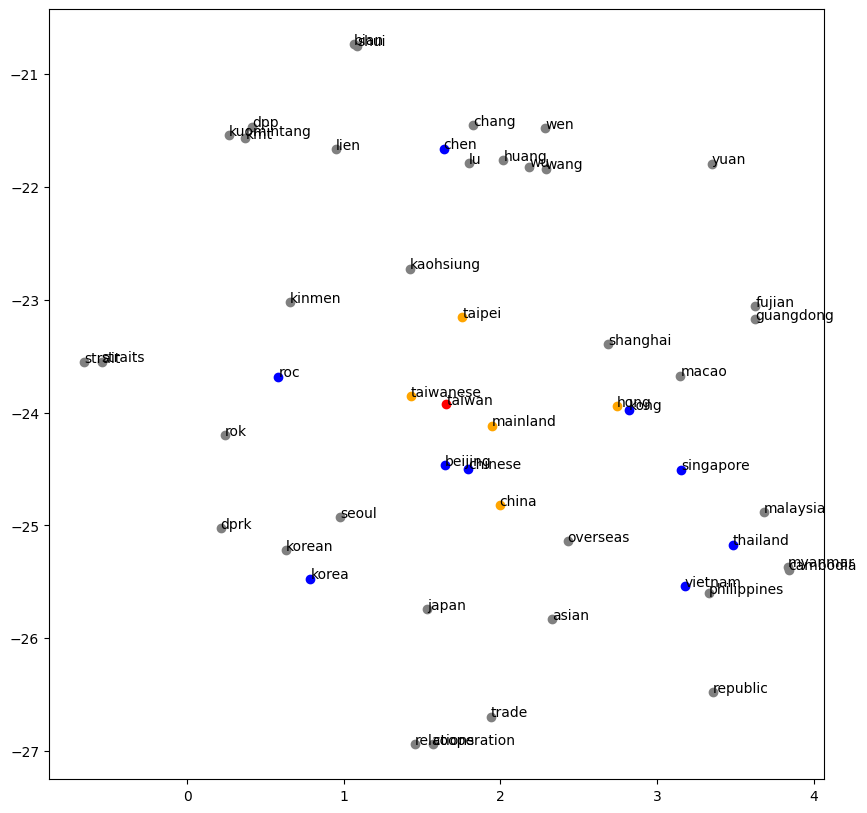

In [98]:
words = ["taiwan"] + [p[0] for p in pred]
vecs = [model["taiwan"]] + [model[p[0]] for p in pred]
tsne = TSNE(n_components=2, random_state=42).fit_transform(np.array(vecs))

plt.figure(figsize = (10, 10))

for i, word in enumerate(words):
    if word == "taiwan":
        plt.scatter(tsne[i, 0], tsne[i, 1], c="red")
    elif pred[i-1][1] > 0.75:
        plt.scatter(tsne[i, 0], tsne[i, 1], c="orange")
    elif pred[i-1][1] > 0.65:
        plt.scatter(tsne[i, 0], tsne[i, 1], c="blue")
    else:
        plt.scatter(tsne[i, 0], tsne[i, 1], c="gray")
    plt.annotate(word, (tsne[i, 0], tsne[i, 1]))
